### Example 1

#### A manufacturer produces bolts with a thickness of exactly 1 inch . A customer takes a random sample of 100 bolts and find that mean is 1.2 inches and standard deviation is .4 inches. Should the manufactures's claim that the bolts are exactly 1 inch be rejected? test at significance level 0.01

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

In [ ]:
alpha = 0.01

In [ ]:
data = np.random.normal(loc=1.20, scale=.40, size=100)
data

array([1.82621228, 1.96596612, 1.33120624, 1.46281162, 1.98910153,
       1.32886515, 1.79992228, 1.34793673, 0.36400743, 1.22976698,
       1.17244296, 1.28870527, 1.28619599, 0.83482721, 1.37588942,
       0.90758067, 1.09417553, 1.07472049, 0.924891  , 1.47699803,
       0.99565756, 1.27752798, 1.30480052, 1.2601102 , 1.09882423,
       1.69644095, 1.15785527, 0.95558472, 0.76140209, 1.08039383,
       0.69837565, 0.61674324, 1.35865487, 1.5429802 , 1.17725022,
       0.90309846, 1.90967939, 1.73511487, 1.5516672 , 0.69395274,
       0.88866878, 0.90003545, 1.30745246, 1.44032053, 1.17141909,
       0.49009997, 0.765894  , 1.34791555, 1.4319447 , 0.98406205,
       1.06760873, 1.03298069, 0.32632084, 1.40737761, 0.92422753,
       1.22623063, 0.62426704, 1.05685243, 1.37262969, 1.52796834,
       1.71379122, 1.08096541, 0.82844758, 1.88895809, 0.50703655,
       0.06069812, 0.55750658, 0.71172157, 1.49421095, 1.67970291,
       0.64389466, 1.37242224, 1.28745808, 1.01026244, 1.09730

In [ ]:
bolts = pd.DataFrame(data, columns = ['thickness'])

In [ ]:
data.mean(), data.std()

(1.1418284762224802, 0.33345916805588033)

In [ ]:
help(stests.ztest)

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples
    x2 : array_like, 1-D or 2-D
        second of the two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : string
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means

In [ ]:
bolts

,thickness
0,1.216050
1,1.492206
2,0.775547
3,0.985855
4,1.109116
...,...
95,0.806221
96,1.014225
97,1.042920
98,1.135865


In [ ]:
zstatistic ,pval = stests.ztest(bolts['thickness'], x2=None, value=1,  alternative='two-sided')

In [ ]:
zstatistic, pval

(4.231928991128971, 2.316955647402102e-05)

In [ ]:
#p_values = scipy.stats.norm.sf(abs(z_scores)) #one-sided
z_score = 4.231928991128971
p_value = stats.norm.sf(abs(z_score))*2 #twosided
p_value

2.316955647402102e-05

In [ ]:
alpha, pval

(0.01, 2.316955647402102e-05)

In [ ]:
if pval<alpha:
    print("reject null hypothesis")
else:
    print("do not reject null hypothesis")

reject null hypothesis


### On Summary data

In [ ]:
import math as m

In [ ]:
n = 100
mu = 1
xbar = 1.2
s = .4
se = s/m.sqrt(n)
alpha = 0.01

In [ ]:
se

0.04

In [ ]:
stests._zstat_generic(xbar,value2 = 0, std_diff = se, alternative= 'two-sided', diff=mu)

(4.999999999999999, 5.73303143758389e-07)

### Example 2

#### A resercher claims that 10 year old watch 6.6 hours of TV daily. Try to verify this with fallowing sample data 
#### n =100 
#### xbar = 6.1 hours 
#### S = 2.5 hours 
#### alpha = .01

In [ ]:
alpha = .01
data = np.random.normal(loc=6.1, scale=2.5, size=100)
df = pd.DataFrame(data, columns = ['hours'])

In [ ]:
df.hours.mean(), df.hours.std()

(5.920677621757939, 2.577908581674117)

In [ ]:
zstatistic ,pval = stests.ztest(df['hours'], x2=None, value=6.6,  alternative='two-sided')
zstatistic, pval

(-2.63516861331407, 0.00840954969136178)

In [ ]:
if pval<alpha:
    print("reject null hypothesis")
else:
    print("do not reject null hypothesis")

reject null hypothesis


In [ ]:
n = 100
mu = 6.6
xbar = 6.1
s = 2.5
se = s/m.sqrt(n)
alpha = 0.01

In [ ]:
z, pval = stests._zstat_generic(xbar,value2 = 0, std_diff = se, alternative= 'two-sided', diff=mu)

In [ ]:
pval, z, alpha

(0.04550026389635839, -2.0, 0.01)

In [ ]:
if pval<alpha:
    print("reject null hypothesis")
else:
    print("do not reject null hypothesis")

do not reject null hypothesis


### Example 3

#### A man purchases bulbs that are supposed to burn for a mean life of atleast 3000 hours with standard deviation of 500 hours. A sample of 100 bulbs is taken with
xbar = 2800 hours
test at alpha = .05

In [ ]:
alpha = .05
data = np.random.normal(loc=2800, scale=500, size=100)
df = pd.DataFrame(data, columns = ['hours'])

In [ ]:
df.hours.mean(), df.hours.std()

(2802.4564784061677, 485.7544602371917)

In [ ]:
zstatistic ,pval = stests.ztest(df['hours'], x2=None, value=3000,  alternative='smaller')
zstatistic, pval

(-4.06673613449423, 2.3838086764639362e-05)

In [ ]:
if pval<alpha:
    print("reject null hypothesis")
else:
    print("do not reject null hypothesis")

reject null hypothesis


In [ ]:
n = 100
mu = 3000
xbar = 2800
s = 500
se = s/m.sqrt(n)
alpha = 0.05

In [ ]:
stests._zstat_generic(xbar,value2 = 0, std_diff = se, alternative= 'smaller', diff=mu)

(-4.0, 3.167124183311986e-05)

### Example4

#### n =324, xbar = 97, s = 9, mu = 100
#### H0 >= 100
#### H1 <100

In [ ]:
alpha = .05
data = np.random.normal(loc=97, scale=9, size=324)
cereal = pd.DataFrame(data, columns = ['raisins'])

In [ ]:
cereal.raisins.mean(), cereal.raisins.std()

(96.72384098935004, 9.208726564104563)

In [ ]:
zstatistic ,pval = stests.ztest(cereal['raisins'], x2=None, value=100,  alternative='smaller')
zstatistic, pval

(-6.403802065484798, 7.577728323032049e-11)

In [ ]:
if pval<aplha:
    print("reject null hypothesis")
else:
    print("do not reject null hypothesis")

reject null hypothesis


In [ ]:
n = 324
mu = 100
xbar = 97
s = 9
se = s/m.sqrt(n)
alpha = 0.05

In [ ]:
stests._zstat_generic(xbar,value2 = 0, std_diff = se, alternative= 'smaller', diff=mu)

(-6.0, 9.865876450376946e-10)

### Two Sample Z test

In [ ]:
#### n1 =120, x1bar = 67500, s1 = 7200
#### n2 = 45, x2bar = 58950, s2 = 4600
#### H0: mu1-mu2<= 5000
#### H1: mu1-mu2 > 5000

In [ ]:
alpha = .05
data1 = np.random.normal(loc=67500, scale=7200, size=120)

In [ ]:
data2 = np.random.normal(loc=58950, scale=4600, size=45)
df1 = pd.DataFrame(data1, columns = ['marketing'])
df2 = pd.DataFrame(data2, columns = ['operations'])

In [ ]:
df1['marketing'].mean(),df1['marketing'].std()

(67540.0815992262, 7098.373946921545)

In [ ]:
df2['operations'].mean(), df2['operations'].std()

(58260.059881997106, 4287.499841834318)

In [ ]:
zstatistic ,pval = stests.ztest(df1['marketing'], df2['operations'], value=5000,  alternative='larger')
zstatistic, pval

(3.7895222859430824, 7.546863523271352e-05)

In [ ]:
if pval<alpha:
    print("reject null hypothesis")
else:
    print("do not reject null hypothesis")

reject null hypothesis


In [ ]:
n1 = 120
x1bar = 67500
s1 = 7200
n2 = 45
x2bar = 58950
s2 = 4600
diff = 5000
se = m.sqrt((s1**2/n1)+(s2**2/n2))
alpha = 0.05

In [ ]:
res = stests._zstat_generic(x1bar,x2bar, std_diff = se, alternative= 'larger', diff=diff)

In [ ]:
res

(3.737417313779651, 9.29601013157504e-05)

### Example 2

In [ ]:
#### n1 =50, x1bar = 65, s1 = 10
#### n2 = 60, x2bar = 68, s2 = 14
#### H0: mu1-mu2 = 0
#### H1: mu1-mu2 != 0

In [ ]:
alpha = .01
data1 = np.random.normal(loc=65, scale=10, size=50)

In [ ]:
df1 = pd.DataFrame(data1, columns = ['men'])

In [ ]:
df1['men'].mean(),df1['men'].std()

(64.39495430454082, 9.911381094197145)

In [ ]:
data2 = np.random.normal(loc=68, scale=14, size=60)

In [ ]:
df2 = pd.DataFrame(data2, columns = ['women'])

In [ ]:
df2['women'].mean(),df2['women'].std()

(67.22814380692715, 14.10282660053742)

In [ ]:
zstatistic ,pval = stests.ztest(df1['men'], df2['women'], value=0,  alternative='two-sided')
zstatistic, pval

(-1.1953046665188751, 0.2319680172152616)

In [ ]:
if pval<alpha:
    print("reject null hypothesis")
else:
    print("do not reject null hypothesis")

do not reject null hypothesis


In [ ]:
n1 = 50
x1bar = 65
s1 = 10
n2 = 60
x2bar = 68
s2 = 14
#### H0: mu1-mu2 = 0
#### H1: mu1-mu2 != 0

In [ ]:
diff = 0
se = m.sqrt((s1**2/n1)+(s2**2/n2))
alpha = 0.05

In [ ]:
stests._zstat_generic(x1bar,x2bar, std_diff = se, alternative= 'two-sided', diff=diff)

(-1.3072340109917853, 0.904433376067667)

### Z Test for Praportion

In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
alpha = .05
n = 250
pnull = 0.12
phat = 0.088
sm.stats.proportions_ztest(phat*n, n, pnull, alternative='two-sided')

(-1.785999065922733, 0.07409940937678348)

#### A survey claims that 9 out of 10 doctors recommend aspirin for their patients with headaches. To test this claim, a random sample of 100 doctors is obtained. Of these 100 doctors, 82 indicate that they recommend aspirin. Is this claim accurate? Use alpha = 0.05.

In [ ]:
alpha = 0.05
n = 100
phat = 82/100
pnull = 9/10

In [ ]:
sm.stats.proportions_ztest(phat*n, n, pnull, alternative='two-sided',prop_var=False)

(-2.0823168251814157, 0.03731354007356495)

In [ ]:
n = 1018
pnull = 0.52
phat = 0.56
sm.stats.proportions_ztest(phat*n, n, pnull, alternative='two-sided')

(2.571067795759113, 0.010138547731721065)

In [ ]:
sm.stats.proportions_ztest(.136*3536, 3536, .211, alternative='smaller')

(-13.010412496663324, 5.3382108369533335e-39)

### T test

In [ ]:
import math as m
xbar = 130
mu = 100
sigma = 15
n = 25
se = sigma/m.sqrt(n)
dof = n-1

#### H0: mu=100
#### H1: mu>100

In [ ]:
from statsmodels.stats import weightstats as stests

In [ ]:
stests._tstat_generic(xbar, value2 = 0, std_diff = se, dof = dof, alternative = 'larger', diff=100)

(10.0, 2.457762763837646e-10)

#### t test with dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = np.random.normal(loc=130, scale=15, size=25)
data.mean(), data.std()

(130.37303674309362, 14.140356467986336)

In [ ]:
data = np.random.normal(loc=130, scale=15, size=25)
data.mean(), data.std()

(130.37303674309362, 14.140356467986336)

In [ ]:
mu = 100

In [ ]:
df = pd.DataFrame(data)

In [ ]:
from scipy import stats
help(stats.ttest_1samp)

Help on function ttest_1samp in module scipy.stats.stats:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate')
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a two-sided test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        sample observation
    popmean : float or array_like
        expected value in null hypothesis. If array_like, then it must have the
        same shape as `a` excluding the axis dimension
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.

In [ ]:
t = stats.ttest_1samp(df,mu)

In [ ]:
t.statistic, t.pvalue

(array([10.52285239]), array([1.8001319e-10]))

In [ ]:
p_value = t.pvalue/2
p_value

array([9.00065949e-11])

#### two tailed with known variance

In [ ]:
xbar = 14.6
mu = 15.4
sigma = 2.5
n = 35
se = sigma/m.sqrt(n)
dof = n-1

#### H0: mu = 15.4
#### H1: mu != 15.4

In [ ]:
stests._tstat_generic(xbar, value2 = 0, std_diff = se, dof = dof, alternative = 'two-sided', diff=mu)

(-1.8931455305918787, 0.0668755205955539)

In [ ]:
data = np.random.normal(loc=14.6, scale=2.5, size=35)
data.mean(), data.std()

(14.565252815901252, 2.87656695240812)

In [ ]:
t = stats.ttest_1samp(data,mu)
t.statistic,t.pvalue

(-1.6920762684708783, 0.09977811620643903)

#### unknown variance

In [ ]:
xbar = 2.1
mu = 2
s = .3
n = 35
se = s/m.sqrt(n)
dof = n-1

#### H0: mu <= 2
#### H1: mu > 2

In [ ]:
stests._tstat_generic(xbar, value2 = 0, std_diff = se, dof = dof, alternative = 'larger', diff=mu)

(1.9720265943665405, 0.02839294739129017)

In [ ]:
data = np.random.normal(loc=2.1, scale=.3, size=35)
print(data.mean())
print(data.std())
t = stats.ttest_1samp(data,2)
t.statistic,t.pvalue

2.069005611783233
0.21103139439549176


(1.906675563297128, 0.06504238203418088)

In [ ]:
t.pvalue/2

0.03252119101709044

#### paired t test

In [ ]:
D= 14
s = 8.5
mud = 10
n= 50
se = s/m.sqrt(n)
dof = n-1

#### H0: mud <= 10
#### H1: mud > 10

In [ ]:
stests._tstat_generic(D, value2 = 0, std_diff = se, dof = dof, alternative = 'larger', diff=mud)

(3.327561323230812, 0.0008338908542431838)

### Two sample t test equal variance

In [ ]:
x1bar = 7.6
x2bar = 6.3
s1 = 1.1
s2 = 1.3
#mu1-mu2 = 1.2
mud = 1.2
n1 = 80
n2 = 80
sp2 = (79*1.1**2+79*1.3**2)/(80+80-1)
se = m.sqrt(sp2 * (1/n1+1/n2))
dof = n1+n2-2

In [ ]:
m.sqrt(sp2 * (1/n1+1/n2))

0.189794658983377

#### H0: mu1-mu2 <= 1.2
#### H1: mu1-mu2 > 1.2

In [ ]:
stests._tstat_generic(value1 = x1bar, value2 = x2bar, std_diff = se, dof = dof, alternative = 'larger', diff=mud)

(0.5268852165579553, 0.29950612651399644)

In [ ]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        population variance [2]_.
    
   

### Two sample t test unequal variance

In [ ]:
x1bar = 10.1
x2bar = 9.5
s1 = 2.4
s2 = 3.1
#mu1-mu2 = 1.2
mud = 0
n1 = 120
n2 = 100
su = m.sqrt(2.4**2/120+3.1**2/100)
se = su
dof = m.floor((su**4)/(((2.4**2/120)**2/(n1-1))+((3.1**2/100)**2/(n2-1))))

In [ ]:
dof

184

In [ ]:
#### H0: mud <= 0
#### H1: mud > 0

In [ ]:
stests._tstat_generic(value1 = x1bar, value2 = x2bar, std_diff = se, dof = dof, alternative = 'larger', diff=mud)

(1.5805901093214958, 0.05784463166631994)

#### Shapiro test for normality

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [ ]:
import numpy as np
s = np.random.normal(0, 20, 1000)

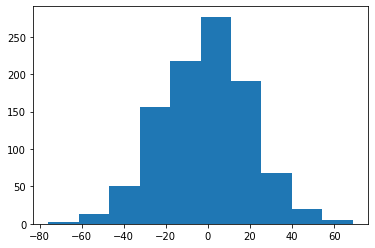

In [ ]:
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

In [ ]:
from scipy import stats
result = stats.shapiro(s)
result

(0.998559296131134, 0.5937654376029968)

In [ ]:
p_value = result[1]
p_value

0.5937654376029968

In [ ]:
if(p_value > .05):
    print("data is from normal distribution")
else:
    print("not from normal distribution")

data is from normal distribution


In [ ]:
s = np.random.uniform(0, 20, 1000)

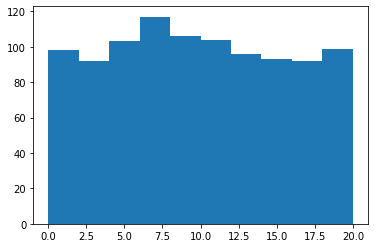

In [ ]:
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

In [ ]:
result = stats.shapiro(s)
result

(0.9589013457298279, 3.789051805891771e-16)

In [ ]:
if(result[1] > .05):
    print("data is from normal distribution")
else:
    print("not from normal distribution")

not from normal distribution


In [ ]:
import pandas as pd
df = pd.read_csv("brakesXL.csv")

In [ ]:
df

,Machine,Brake
0,1,322.0003
1,1,322.0048
2,1,322.0215
3,1,321.9907
4,1,322.0109
...,...,...
123,8,322.0038
124,8,322.0035
125,8,321.9803
126,8,321.9942


In [ ]:
result = stats.shapiro(df['Brake'])
result

(0.9929972887039185, 0.7777344584465027)

In [ ]:
if(result[1] > .05):
    print("data is from normal distribution")
else:
    print("not from normal distribution")

data is from normal distribution


#### H0: mu = 322
#### H1: mu != 322

In [ ]:
t = stats.ttest_1samp(df['Brake'],322)
t.statistic, t.pvalue

(2.0986260940265966, 0.03783061703254818)

In [ ]:
if(t.pvalue>.05):
    print("can't reject null hypothesis")
else:
    print("reject null hypothesis")

reject null hypothesis


In [ ]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        population variance [2]_.
    
   

<b>Furnace Data.</b>

Wisconsin Power and Light studied the effectiveness of two devices for
improving the efficiency of gas home-heating systems.  The electric vent
damper (EVD) reduces heat loss through the chimney when the furnace
is in its off cycle by closing off the vent.  It is controlled electrically.
The thermally activated vent damper (TVD) is the same as the EVD except
it is controlled by the thermal properties of a set of bimetal fins set in
the vent.  Ninety test houses were used, 40 with TVD's and 50 with EVD's.
For each house, energy consumption was measured for a period of several
weeks with the vent damper active and for a period with the vent damper 
not active.  This should help show how effective the vent damper is in 
each house.

Both overall weather conditions and the size of a house can greatly
affect energy consumption.  A simple formula was used to try to adjust
for this.  Average energy consumed by the house during one period was
recorded as (consumption)/[(weather)(house area)], where consumption
is total energy consumption for the period, measured in BTU's, weather
is measured in number of degree days, and house area is measured in 
square feet.  In addition, various characteristics of the house, chimney,
and furnace were recorded for each house.  A few observations were
missing and recorded as dots.

--------------------------------------------------------------------------
Description of Furnace Data:

    VARIABLE   

1.  TYPE        Type of furnace: 1=forced air, 2=gravity, 3=forced water
2.  CH.AREA     Chimney area
3.  CH.SHAPE    Chimney shape: 1=round, 2=square, 3=rectangular
4.  CH.HT       Chimney height (in feet)
5.  CH.LINER    Type of chimney liner: 0=unlined, 1=tile, 2=metal
6.  HOUSE       Type of house: 1=ranch, 2=two-story, 3=tri-level, 4=bi-level,
                5=one and a half stories
7.  AGE         House age in years (99 means 99 or more years)
8.  BTU.IN      Average energy consumption with vent damper in
9.  BTU.OUT     Average energy consumption with vent damper out
10. DAMPER      Type of damper: 1=EVD, 2=TVD

#### Bartlett’s test

Bartlett’s test for homogeneity of variances is used to test that variances are equal for all samples.

In [ ]:
from scipy import stats
stats.bartlett([1,2,3,4,5], [3,40,80])

BartlettResult(statistic=15.882402933692443, pvalue=6.740251381770005e-05)

In [ ]:
df = pd.read_csv("FurnaceXL.csv")
df

,Type,CH.Area,CH.Shape,CH.HT,CH.Liner,House,Age,BTU.In,BTU.Out,Damper
0,1,28,1,20,2,3,8,7.87,8.25,1
1,2,144,2,26,0,2,75,9.43,9.66,1
2,1,80,3,30,1,2,44,7.16,8.33,1
3,2,100,2,24,0,2,75,8.67,8.82,1
4,3,168,3,35,1,2,30,12.31,12.06,1
...,...,...,...,...,...,...,...,...,...,...
85,2,100,2,24,0,2,70,14.35,15.26,2
86,2,96,1,17,0,1,40,13.42,14.53,2
87,1,100,2,20,1,2,99,6.35,6.84,2
88,1,100,2,20,1,1,14,9.83,10.92,2


In [ ]:
data = {'Category': ['cat2','cat1','cat2','cat1','cat2','cat1','cat2','cat1','cat1','cat1','cat2'],
        'values': [1,2,3,1,2,3,1,2,3,5,1]}
my_data = pd.DataFrame(data)
my_data.groupby('Category').mean()

,values
Category,
cat1,2.666667
cat2,1.600000


In [ ]:
my_data

,Category,values
0,cat2,1
1,cat1,2
2,cat2,3
3,cat1,1
4,cat2,2
5,cat1,3
6,cat2,1
7,cat1,2
8,cat1,3
9,cat1,5


In [ ]:
import pandas as pd

In [ ]:
cat1 = my_data[my_data['Category']=='cat1']
cat2 = my_data[my_data['Category']=='cat2']
cat1,cat2

(  Category  values
 1     cat1       2
 3     cat1       1
 5     cat1       3
 7     cat1       2
 8     cat1       3
 9     cat1       5,    Category  values
 0      cat2       1
 2      cat2       3
 4      cat2       2
 6      cat2       1
 10     cat2       1)

T-test to see if the mean of cat1 and cat2 are statistically different.

In [ ]:
stats.bartlett(cat1['values'],cat2['values'])

BartlettResult(statistic=0.6759500041337714, pvalue=0.4109848239461533)

In [ ]:
stats.ttest_ind(cat1['values'], cat2['values'], equal_var=True)

Ttest_indResult(statistic=1.4927289925706944, pvalue=0.16970867501294376)

In [ ]:
help(stats.ttest_rel)

Help on function ttest_rel in module scipy.stats.stats:

ttest_rel(a, b, axis=0, nan_policy='propagate')
    Calculate the T-test on TWO RELATED samples of scores, a and b.
    
    This is a two-sided test for the null hypothesis that 2 related or
    repeated samples have identical average (expected) values.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape.
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    statistic : float or array
        t-statistic
    pvalue : float or array
        two-tailed p-value
    
    Notes
    -----
    Examples for the use are sco

### Chi Square test

In [ ]:
import pandas as pd
df = pd.read_csv('Chi_Sq.csv')

In [ ]:
df

,Gender,Party
0,male,democrat
1,male,democrat
2,male,democrat
3,male,democrat
4,male,democrat
...,...,...
95,male,other
96,male,other
97,male,other
98,male,other


#### H0: gender and voting preferences are independent.

In [ ]:
contingency_table=pd.crosstab(df["Gender"],df["Party"])
contingency_table

Party,democrat,other,republic
Gender,,,
female,22,1,27
male,28,4,18


In [ ]:
print('contingency_table :-\n',contingency_table)#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

contingency_table :-
 Party   democrat  other  republic
Gender                           
female        22      1        27
male          28      4        18
Observed Values :-
 [[22  1 27]
 [28  4 18]]


In [ ]:
from scipy.stats import chi2_contingency,chisquare
stat, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
stat, p, dof, expected

(4.32, 0.11532512103806253, 2, array([[25. ,  2.5, 22.5],
        [25. ,  2.5, 22.5]]))

In [ ]:
expected

array([[25. ,  2.5, 22.5],
       [25. ,  2.5, 22.5]])

In [ ]:
from scipy.stats import chi2
alpha = .05
ddof = dof

In [ ]:
critical_value=chi2.ppf(q=1-alpha, df=ddof)
print('critical_value:',critical_value)

critical_value: 5.991464547107979


In [ ]:
if stat>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [ ]:
200–180)²/180 + (150–180)²/180 + (50–40)²/40 + (250–270)²/270 + (300–270)²/270 + (50–60)²/60

In [ ]:
expected = [[180,  180, 40], [270,270,60]]
expected

[[180, 180, 40], [270, 270, 60]]

In [ ]:
stat, p, dof, expected = chi2_contingency(table.table_orig)

In [ ]:
ddof = 1*2

In [ ]:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

AttributeError: 'list' object has no attribute 'iloc'

In [ ]:
import statsmodels.api as sm
data = df[["Gender", "Party"]]

table = sm.stats.Table.from_data(data)
table.table_orig

Party,democrat,other,republic
Gender,,,
female,22,1,27
male,28,4,18


In [ ]:
table.fittedvalues

Party,democrat,other,republic
Gender,,,
female,25.0,2.5,22.5
male,25.0,2.5,22.5


In [ ]:
table.resid_pearson

Party,democrat,other,republic
Gender,,,
female,-0.6,-0.948683,0.948683
male,0.6,0.948683,-0.948683


In [ ]:
from scipy.stats import chi2_contingency,chisquare

In [ ]:
stat, p, dof, expected = chi2_contingency(table.table_orig)

In [ ]:
expected,dof,p,stat

(array([[25. ,  2.5, 22.5],
        [25. ,  2.5, 22.5]]), 2, 0.11532512103806253, 4.32)

In [ ]:
chi2, p = chisquare(table.table_orig.values.ravel(), f_exp=expected.ravel(),
                             ddof=table.table_orig - 1 - dof,axis=None)

In [ ]:
chi2

4.32

### ANOVA

In [ ]:
import scipy.stats as stats

In [ ]:
df = pd.read_csv('carpet.csv')

In [ ]:
df

,Durability,Carpet,Composition
0,18.95,1,A
1,12.62,1,B
2,11.94,1,A
3,14.42,1,B
4,10.06,2,A
5,7.19,2,B
6,7.03,2,A
7,14.66,2,B
8,10.92,3,A
9,13.28,3,B


In [ ]:
stats.bartlett(df['Durability'][df['Carpet'] == 1], 
             df['Durability'][df['Carpet'] == 2],
             df['Durability'][df['Carpet'] == 3],
             df['Durability'][df['Carpet'] == 4])

BartlettResult(statistic=3.6873353831865456, pvalue=0.2972656895216277)

#### 0.29 > 0.05 so equal variance

In [ ]:
stats.f_oneway(df['Durability'][df['Carpet'] == 1], 
             df['Durability'][df['Carpet'] == 2],
             df['Durability'][df['Carpet'] == 3],
             df['Durability'][df['Carpet'] == 4])

F_onewayResult(statistic=3.581516025979231, pvalue=0.04673622246265323)

 F_statistic= 3.58, p = 0.046. This tells us that there is a significant difference in the group means.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['Durability'], df['Carpet'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -4.7475 0.3118 -12.4969  3.0019  False
     1      3   -1.675    0.9  -9.4244  6.0744  False
     1      4   3.6325 0.5258  -4.1169 11.3819  False
     2      3   3.0725 0.6402  -4.6769 10.8219  False
     2      4     8.38 0.0328   0.6306 16.1294   True
     3      4   5.3075 0.2296  -2.4419 13.0569  False
-----------------------------------------------------


In [ ]:
stats.ttest_ind(df['Durability'][df['Carpet'] == 1], df['Durability'][df['Carpet'] == 2])

Ttest_indResult(statistic=1.9936018154522914, pvalue=0.09324942158759898)

In [ ]:
stats.ttest_ind(df['Durability'][df['Carpet'] == 1], df['Durability'][df['Carpet'] == 3])

Ttest_indResult(statistic=0.9577587572326379, pvalue=0.3751689477291837)

In [ ]:
stats.ttest_ind(df['Durability'][df['Carpet'] == 1], df['Durability'][df['Carpet'] == 4])

Ttest_indResult(statistic=-1.1558746276039693, pvalue=0.29167580291656153)

In [ ]:
stats.ttest_ind(df['Durability'][df['Carpet'] == 2], df['Durability'][df['Carpet'] == 3])

Ttest_indResult(statistic=-1.5872958941273796, pvalue=0.16354318632626003)

In [ ]:
stats.ttest_ind(df['Durability'][df['Carpet'] == 2], df['Durability'][df['Carpet'] == 4])

Ttest_indResult(statistic=-2.578217458421381, pvalue=0.04186967631887867)

In [ ]:
stats.ttest_ind(df['Durability'][df['Carpet'] == 3], df['Durability'][df['Carpet'] == 4])

Ttest_indResult(statistic=-1.8821220295354195, pvalue=0.10883435905322392)

In [ ]:
.05/4

0.0125

In [ ]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

# Loading data
df = pd.read_csv("difficile.csv")
df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

In [ ]:
stats.levene(df['libido'][df['dose'] == 'placebo'],
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'high'])

LeveneResult(statistic=0.11764705882352934, pvalue=0.8900225182757423)

In [ ]:
stats.bartlett(df['libido'][df['dose'] == 'placebo'],
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'high'])

BartlettResult(statistic=0.18530262983590715, pvalue=0.9115112752750292)

#### Levene’s test for homogeneity of variance is not significant which indicates that the groups have equal variances.

In [ ]:
stats.f_oneway(df['libido'][df['dose'] == 'high'], 
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'placebo'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

The F-statistic= 5.119 and the p-value= 0.025 which is indicating that there is an overall significant effect of medication on libido. However, we don’t know where the difference between dosing/groups is yet. This is in the post-hoc section.

#### This tells us if we explained a significant amount of the overall variance. To test between groups, we need to do some post-hoc testing where we can compare all groups against each other. 

<b>Post-hoc Testing</b>

The overall model was significant, now to test which groups differ. Deciding which groups to compare should be theory driven. There are a few different techniques that can be used. Each of these techniques have different ways of controlling for familywise error rate. 3 common methods are:

        Fisher’s Least Significant Difference (LSD): Take the groups you want to compare and conduct multiple t-tests. This method requires that the ANOVA model be significant. This method is easy, but receives push back since it doesn’t account for familywise error rate. The argument is that since the overall model was significant, one is protected from increasing the familywise error rate.

        Bonferroni correction: Take the alpha the ANOVA was tested at, 0.05, then divide it by the number of planned comparisons. In this case, 0.05/3 = 0.0167. A post-hoc test would have to have an alpha level < 0.0167 to be considered significant. To test the groups, conduct multiple t-tests, but set the alpha value to the corrected value. This method is quick, but often considered too conservative.

    Tukey’s HSD: Method also controls for familywise error rate with a different method than Bonferroni, and is also considered conservative.

There are many other techniques out there that can be used for post-hoc testing each with different guidelines for when they should be used, you are encouraged to learn about them!

### Tukey’s HSD Post-hoc comparison

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['libido'], df['dose'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
  high     low     -1.8 0.1472 -4.1651  0.5651  False
  high placebo     -2.8 0.0209 -5.1651 -0.4349   True
   low placebo     -1.0 0.5171 -3.3651  1.3651  False
-----------------------------------------------------


The Tukey HSD post-hoc comparison test controls for type I error and maintains the familywise error rate at 0.05 (FWER= 0.05 top of the table). The group1 and group2 columns are the groups being compared, the meandiff column is the difference in means of the two groups being calculated as group2 – group1, the lower/upper columns are the lower/upper boundaries of the 95% confidence interval, and the reject column states whether or not the null hypothesis should be rejected. Unfortunately, this method currently does not provide the t-statistic so treatment effect size cannot be calculated.

### Bonferroni Correction Post-hoc Comparison

First the corrected p-value needs to be calculated. This can be done using the formula:

p-value/# of comparisons = 0.05/3 = 0.01667

Now the t-tests that are conducted have to have a p-value less than 0.01667 in order to be considered significant.

In [ ]:
stats.ttest_ind(df['libido'][df['dose'] == 'high'], df['libido'][df['dose'] == 'low'])

Ttest_indResult(statistic=1.963961012123931, pvalue=0.08513507177899203)

In [ ]:
stats.ttest_ind(df['libido'][df['dose'] == 'low'], df['libido'][df['dose'] == 'placebo'])

Ttest_indResult(statistic=1.2126781251816647, pvalue=0.2598450452137845)

In [ ]:
stats.ttest_ind(df['libido'][df['dose'] == 'high'], df['libido'][df['dose'] == 'placebo'])

Ttest_indResult(statistic=3.0550504633038926, pvalue=0.015700141250047695)

Using the Bonferroni correction, only the difference between the high dose and placebo groups are significantly different. We can calculate the high dosing’s effect size! To calculate the effect size for the treatment dosing we also need to calculate the degrees of freedom since it’s not provided. The following equations can be used:

dof = #_observations_group1 + #_observations_group2 - #_of_groups
dof = 5 + 5 - 2 = 8
effect size r = square root of (t2/t2 + dof)
effect size r = sqrt(1.213**2/(1.213**2 + 8)) = 0.39


The high dose has a medium effect size.

<b>ANOVA Results Interpretation</b>

While interpreting the ANOVA results, the Bonferroni post-hoc analysis results will be used.

There was a significant effect of Difficile on the level of libido, F(2,12)= 5.12, p < 0.05, ?2 = 0.35. Planned post-hoc testing, using the Bonferroni correction ?= 0.0167, revealed that high dose of Difficile significantly increased libido compared to the placebo, t(8)=3.06, p < 0.0167, r= 0.39. There were no other statistically significant differences between groups. 

### Kruskal Wallis H-test test

In [ ]:
import pandas
from scipy.stats import mstats

df = pd.read_csv("difficile.csv")
df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

In [ ]:
df

,dose,libido
0,placebo,3
1,placebo,2
2,placebo,1
3,placebo,1
4,placebo,4
5,low,5
6,low,2
7,low,4
8,low,2
9,low,3


In [ ]:
high = df['libido'][df['dose'] == 'high'] 
low = df['libido'][df['dose'] == 'low']
placebo = df['libido'][df['dose'] == 'placebo']

In [ ]:
np.array(high),np.array(low),np.array(placebo)

(array([7, 4, 5, 3, 6]), array([5, 2, 4, 2, 3]), array([3, 2, 1, 1, 4]))

In [ ]:
import numpy as np

In [ ]:
groups = {}
for grp in df['dose'].unique():
    groups[grp] = df['libido'][df['dose']==grp].values

print(groups)

{'placebo': array([3, 2, 1, 1, 4]), 'low': array([5, 2, 4, 2, 3]), 'high': array([7, 4, 5, 3, 6])}


In [ ]:
args = [groups[grp] for grp in sorted(df['dose'].unique())]
args

[array([7, 4, 5, 3, 6]), array([5, 2, 4, 2, 3]), array([3, 2, 1, 1, 4])]

In [ ]:
H, pval = mstats.kruskalwallis(np.array(high),np.array(low),np.array(placebo))
#H, pval = mstats.kruskalwallis(*args)

print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 6.200000000000009
P-Value: 0.0450492023935576
Reject NULL hypothesis - Significant differences exist between groups.


A shoe company wants to know if three groups of workers have different salaries:

In [ ]:
Women = np.array([23000, 41000, 54000, 66000, 78000])
Men = np.array([45000, 55000, 60000, 70000, 72000])
Minorities =  np.array([1800, 3000, 3400, 4000, 4400])
data = list(zip(Women,Men,Minorities))
data

[(23000, 45000, 1800),
 (41000, 55000, 3000),
 (54000, 60000, 3400),
 (66000, 70000, 4000),
 (78000, 72000, 4400)]

In [ ]:
df = pd.DataFrame(data, columns = ['Women','Men','Minorities'])
df

,Women,Men,Minorities
0,23000,45000,1800
1,41000,55000,3000
2,54000,60000,3400
3,66000,70000,4000
4,78000,72000,4400


In [ ]:
stats.bartlett(df['Women'],df['Men'],df['Minorities'])

BartlettResult(statistic=17.48023090929511, pvalue=0.00016003541001102507)

In [ ]:
H, pval = mstats.kruskalwallis(df['Women'].values,df['Men'].values,df['Minorities'].values)
#H, pval = mstats.kruskalwallis(*args)

print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 9.620000000000005
P-Value: 0.008147859697679966
Reject NULL hypothesis - Significant differences exist between groups.


### Wilcoxon

The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.

the differences in height between cross- and self-fertilized corn plants is given as follows:

In [ ]:
d = [6, 8, 14, 16, 23, 24, 28, 29, 41, -48, 49, 56, 60, -67, 75]

Cross-fertilized plants appear to be be higher. To test the null hypothesis that there is no height difference, we can apply the two-sided test:

In [ ]:
from scipy.stats import wilcoxon
w, p = wilcoxon(d)
w,p

(24.0, 0.04088813291185591)

Hence, we would reject the null hypothesis at a confidence level of 5%, concluding that there is a difference in height between the groups. 